In [274]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



<p style="font-size:24px">Part 1: Data Preparation
</p>


In [275]:
df = pd.read_csv("train.csv")  


print("Shape of dataset:", df.shape)
df.head()




Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [276]:
df = df.drop('Name', axis=1)
df = df.drop('PassengerId', axis=1)


In [277]:
df.info()
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [278]:
df.duplicated().sum()
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [279]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')  
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')  
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
df.isnull().sum()




Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<p style="font-size:24px"><p style="font-size:24px">Part 2: Data Transformation</p>
</p>



In [280]:


print(df['Sex'].unique())
print(df['Embarked'].unique())

df.describe()

['male' 'female']
['S' 'C' 'Q']


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [281]:
categorical_col=['Sex', 'Embarked']
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])
    
df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,1,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,2
1,1.0,1.0,0,38.0,1.0,0.0,PC 17599,71.2833,C85,0
2,1.0,3.0,0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,2
3,1.0,1.0,0,35.0,1.0,0.0,113803,53.1000,C123,2
4,0.0,3.0,1,35.0,0.0,0.0,373450,8.0500,B96 B98,2


In [282]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

#we will use standard diviation and mean to scale numbers below in survival rate by age group
std_age = df['Age'].std()
mean_age = df['Age'].mean()

# Scaling numerical features
scaler = StandardScaler()


df[['Age']] = scaler.fit_transform(df[['Age']])
df[['Fare']] = scaler.fit_transform(df[['Fare']])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3.0,1,-0.592481,1.0,0.0,A/5 21171,-0.502445,B96 B98,2
1,1.0,1.0,0,0.638789,1.0,0.0,PC 17599,0.786845,C85,0
2,1.0,3.0,0,-0.284663,0.0,0.0,STON/O2. 3101282,-0.488854,B96 B98,2
3,1.0,1.0,0,0.407926,1.0,0.0,113803,0.420730,C123,2
4,0.0,3.0,1,0.407926,0.0,0.0,373450,-0.486337,B96 B98,2


In [283]:
#creating a new cloumn
df['FamilySize'] = df['SibSp'] + df['Parch'] 

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,0.0,3.0,1,-0.592481,1.0,0.0,A/5 21171,-0.502445,B96 B98,2,1.0
1,1.0,1.0,0,0.638789,1.0,0.0,PC 17599,0.786845,C85,0,1.0
2,1.0,3.0,0,-0.284663,0.0,0.0,STON/O2. 3101282,-0.488854,B96 B98,2,0.0
3,1.0,1.0,0,0.407926,1.0,0.0,113803,0.420730,C123,2,1.0
4,0.0,3.0,1,0.407926,0.0,0.0,373450,-0.486337,B96 B98,2,0.0


<p style="font-size:24px"><p style="font-size:24px">Part 3: Exploratory Data Analysis (EDA)</p>
</p>



In [284]:
# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:\n", gender_survival)



Survival Rate by Gender:
 Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


In [285]:
# Survival rate by class
class_survival = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:\n", class_survival)



Survival Rate by Passenger Class:
 Pclass
1.0    0.629630
2.0    0.472826
3.0    0.242363
Name: Survived, dtype: float64


In [286]:

# Define age groups
age_groups = [(0-mean_age)/std_age, (12-mean_age)/std_age,  (35-mean_age)/std_age, (60-mean_age)/std_age, ((100-mean_age)/std_age)]
age_labels = ['Child', 'Teen',  'Adult', 'Senior']

# Create age group column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_groups, labels=age_labels)

# Survival rate by age group
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rate by Age Group:\n", agegroup_survival)
print(std_age,mean_age)




Survival Rate by Age Group:
 AgeGroup
Child     0.579710
Teen      0.354344
Adult     0.416268
Senior    0.269231
Name: Survived, dtype: float64
13.002015226002882 29.69911764705882


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9304\1969113866.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()


### Summary of Insights

| Category    | Key Insight                                                |
|-------------|-------------------------------------------------------------|
| Gender      | Females had a much higher survival rate than males.        |
| Class       | Higher-class passengers (1st class) survived more often.   |
| Age Group   | Children were prioritized; young adults had lower rates.   |


##### Part 4: Data Visualization

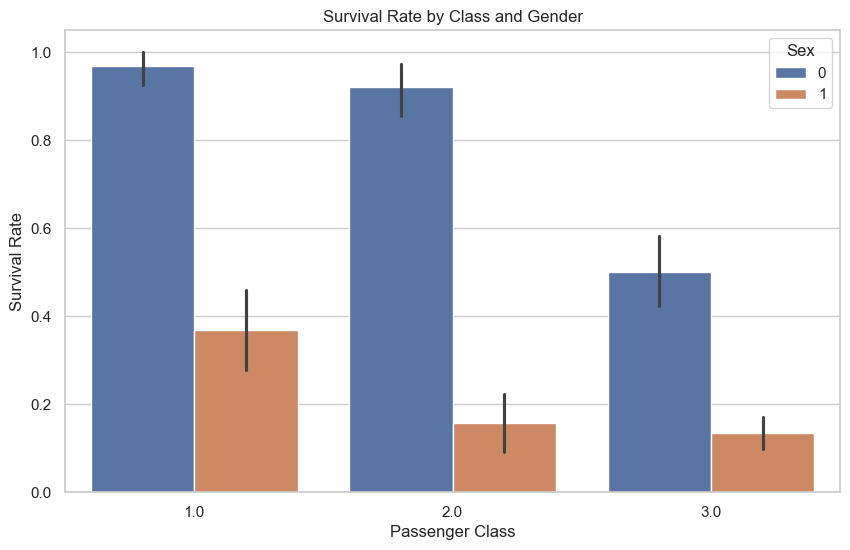

In [287]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


#bar plot for survivals by both class and gender
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()




In [288]:
df['Age'] = scaler.inverse_transform(df[['Age']])
df['Fare'] = scaler.inverse_transform(df[['Fare']])
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]



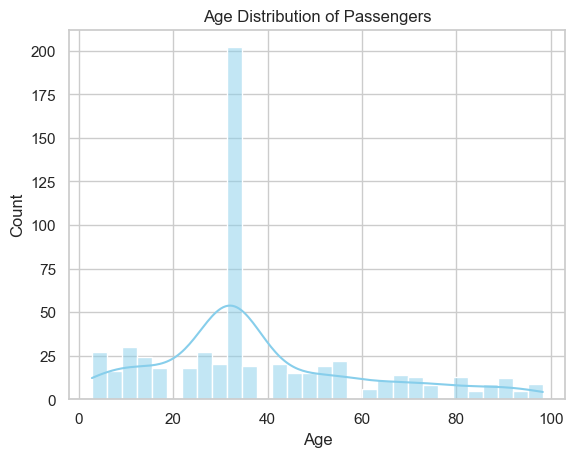

In [289]:



sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_9304\3319815574.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')


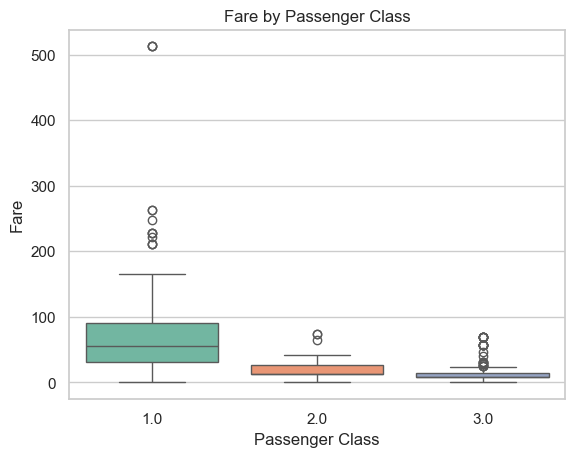

In [290]:
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')
plt.title('Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


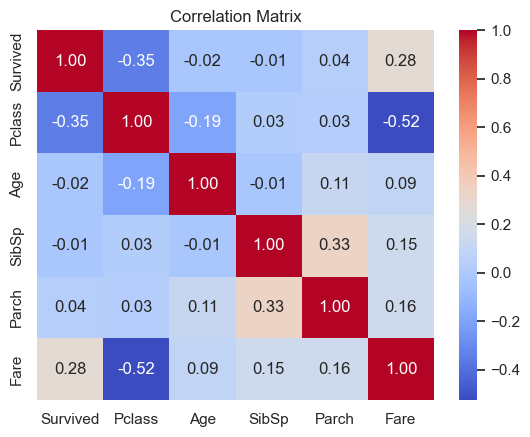

In [291]:
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


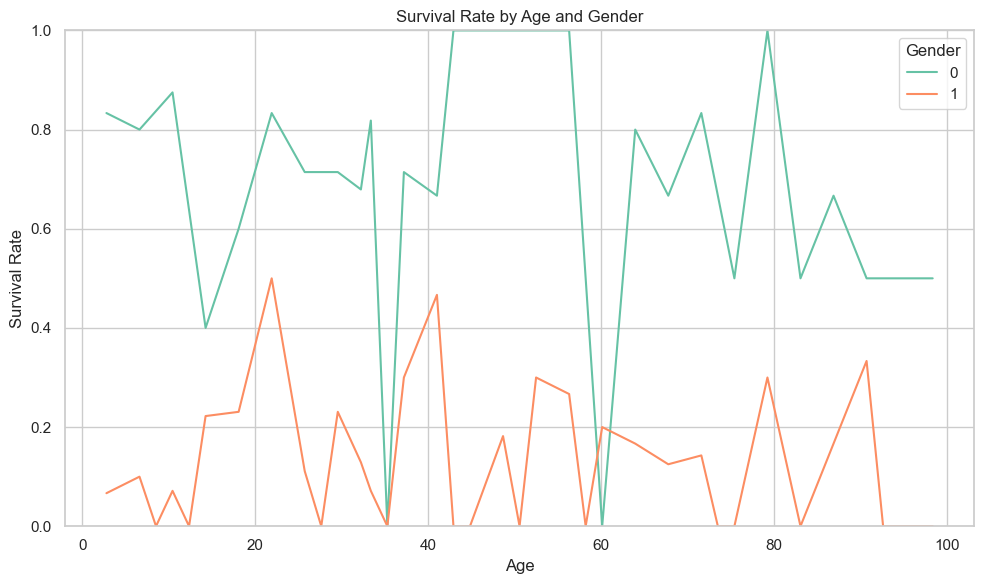

In [292]:

df_age_gender = df.dropna(subset=["Age"])
age_gender_survival = df_age_gender.groupby(["Age", "Sex"])["Survived"].mean().reset_index()

# Plot using seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_gender_survival, x="Age", y="Survived", hue="Sex", palette="Set2")

# Labels and title
plt.title("Survival Rate by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()
plt.show()


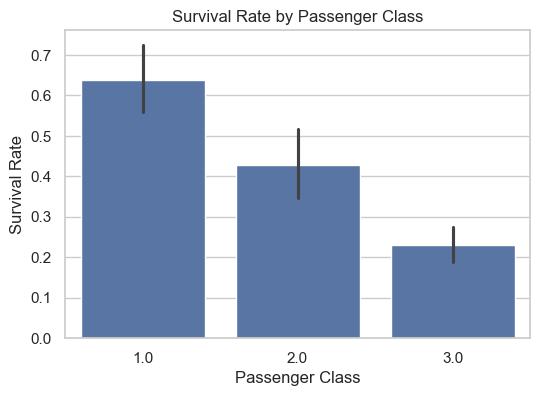

In [293]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
